## Varying Loss Optimizer

In [1]:
from torchvision import datasets
import torch
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import numpy as np
import torch.nn as nn
from torch.optim import SGD,Adam
from torch.utils.data import Dataset,DataLoader
device='cuda' if torch.cuda.is_available() else 'cpu'
data_folder='../data'
fmnist=datasets.FashionMNIST(data_folder,download=True,train=True)
tr_images=fmnist.data
tr_targets=fmnist.targets
val_fmnist=datasets.FashionMNIST(data_folder,download=True,train=False)
val_images=val_fmnist.data
val_targets=val_fmnist.targets

In [2]:
class FMNISTDataset(Dataset):
    def __init__(self,x,y):
        x=x.float()/255
        x=x.view(-1,28*28)
        self.x,self.y=x,y
    def __getitem__(self, item):
        return self.x[item].to(device),self.y[item].to(device)
    def __len__(self):
        return len(self.x)
def get_model():
    model=nn.Sequential(
        nn.Linear(28*28,1000),
        nn.ReLU(),
        nn.Linear(1000,10)
    ).to(device)
    loss_fn=nn.CrossEntropyLoss()
    optimizer=SGD(model.parameters(),lr=1e-2)
    return model,loss_fn,optimizer
def train_batch(x,y,model,opt,loss_fn):
    model.train()
    prediction=model(x)
    batch_loss=loss_fn(prediction,y)
    batch_loss.backward()
    opt.step()
    opt.zero_grad()
    return batch_loss.item()
def accuracy(x,y,model):
    model.eval()
    # this is the same as @torch.no_grad
    # at the top of function, only difference
    # being grad is not computed in the with scope
    with torch.no_grad():
        prediction=model(x)
    max_value,argmaxes=prediction.max(-1)
    is_correct=argmaxes==y
    return is_correct.cpu().numpy().tolist()

In [3]:
def get_data():
    train=FMNISTDataset(tr_images,tr_targets)
    trn_dl=DataLoader(train,batch_size=32,shuffle=True)
    val=FMNISTDataset(val_images,val_targets)
    val_dl=DataLoader(val,batch_size=len(val_images),shuffle=False)
    return trn_dl,val_dl

In [4]:
@torch.no_grad()
def val_loss(x,y,model,loss_fn):
    prediction=model(x)
    val_loss=loss_fn(prediction,y)
    return val_loss.item()

In [5]:
trn_dl,val_dl=get_data()
model,loss_fn,optimizer=get_model()

In [6]:
train_losses,train_accuracies=[],[]
val_losses,val_accuracies=[],[]
for epoch in range(10):
    print(epoch)
    train_epoch_losses,train_epoch_accuracies=[],[]
    for ix,batch in enumerate(iter(trn_dl)):
        x,y=batch
        batch_loss=train_batch(x,y,model,optimizer,loss_fn)
        train_epoch_losses.append(batch_loss)
    train_epoch_loss=np.array(train_epoch_losses).mean()
    for ix,batch in enumerate(iter(trn_dl)):
        x,y=batch
        is_correct=accuracy(x,y,model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy=np.mean(train_epoch_accuracies)
    for ix,batch in enumerate(iter(val_dl)):
        x,y=batch
        val_is_correct=accuracy(x,y,model)
        validation_loss=val_loss(x,y,model,loss_fn)
    val_epoch_accuracy=np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4
5
6
7
8
9


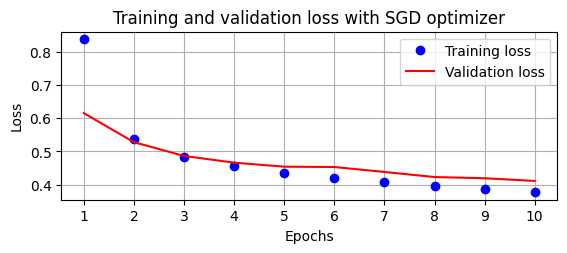

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25000\4139850154.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x*100:.0f}%' for x in plt.gca().get_yticks()])


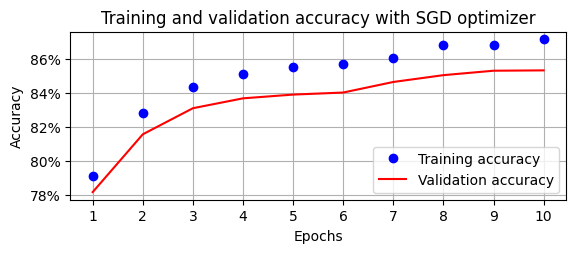

In [7]:
epochs=np.arange(10)+1
plt.subplot(211)
plt.plot(epochs,train_losses,'bo',label='Training loss')
plt.plot(epochs,val_losses,'r',label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss with SGD optimizer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy with SGD optimizer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels([f'{x*100:.0f}%' for x in plt.gca().get_yticks()])
plt.legend()
plt.grid('off')
plt.show()

In [8]:
def get_model():
    model = nn.Sequential(
        nn.Linear(28 * 28, 1000),
        nn.ReLU(),
        nn.Linear(1000, 10)
    ).to(device)

    loss_fn = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr=1e-2)
    return model, loss_fn, optimizer

In [9]:
trn_dl, val_dl = get_data()
model, loss_fn, optimizer = get_model()

In [10]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []
for epoch in range(10):
    print(epoch)
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        train_epoch_losses.append(batch_loss) 
    train_epoch_loss = np.array(train_epoch_losses).mean()

    for ix, batch in enumerate(iter(trn_dl)):
        x, y = batch
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    for ix, batch in enumerate(iter(val_dl)):
        x, y = batch
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model,loss_fn)
    val_epoch_accuracy = np.mean(val_is_correct)
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(validation_loss)
    val_accuracies.append(val_epoch_accuracy)

0
1
2
3
4
5
6
7
8
9


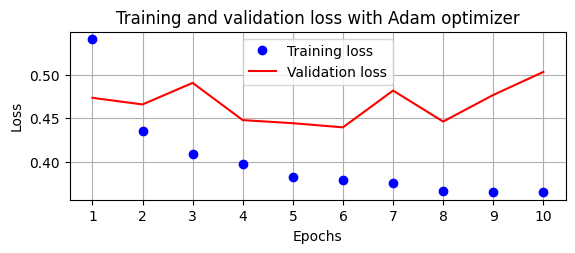

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25000\2664646917.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['{:.0f}%'.format(x*100) for x in plt.gca().get_yticks()])


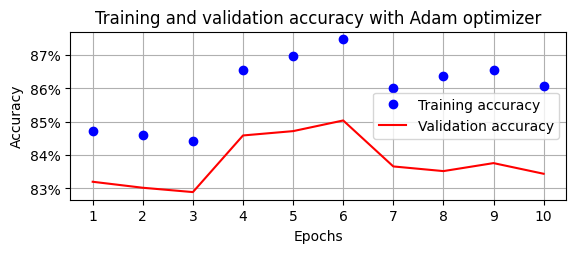

In [11]:
epochs = np.arange(10)+1
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
plt.subplot(211)
plt.plot(epochs, train_losses, 'bo', label='Training loss')
plt.plot(epochs, val_losses, 'r', label='Validation loss')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation loss with Adam optimizer')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid('off')
plt.show()
plt.subplot(212)
plt.plot(epochs, train_accuracies, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title('Training and validation accuracy with Adam optimizer')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.gca().set_yticklabels([f'{x*100:.0f}%' for x in plt.gca().get_yticks()]) 
plt.legend()
plt.grid('off')
plt.show()